<a href="https://colab.research.google.com/github/Sau1o/visaoComputacional/blob/main/Reconhecimento_de_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
path = '/content/drive/MyDrive/VisaoComputacional/Datasets/yalefaces.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [5]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject09.leftlight.gif', 'subject07.wink.gif', 'subject01.leftlight.gif', 'subject04.centerlight.gif', 'subject01.rightlight.gif', 'subject03.centerlight.gif', 'subject07.sleepy.gif', 'subject10.glasses.gif', 'subject02.noglasses.gif', 'subject12.centerlight.gif', 'subject01.glasses.gif', 'subject04.rightlight.gif', 'subject09.glasses.gif', 'subject15.wink.gif', 'subject15.happy.gif', 'subject12.sad.gif', 'subject05.happy.gif', 'subject08.happy.gif', 'subject15.noglasses.gif', 'subject05.glasses.gif', 'subject10.normal.gif', 'subject05.normal.gif', 'subject05.noglasses.gif', 'subject13.normal.gif', 'subject04.normal.gif', 'subject11.noglasses.gif', 'subject10.sleepy.gif', 'subject14.glasses.gif', 'subject11.wink.gif', 'subject06.noglasses.gif', 'subject02.happy.gif', 'subject10.wink.gif', 'subject01.sleepy.gif', 'subject04.noglasses.gif', 'subject09.centerlight.gif', 'subject02.glasses.gif', 'subject07.surprised.gif', 'subject05.rightlight.gif', 'subject06.wink.gif', 'subject09.nogl

In [10]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train',f) for f in os.listdir('/content/yalefaces/train')]
  faces = []
  ids = []
  for path in paths:
    imagem = Image.open(path).convert('L')
    imagem_np = np.array(imagem,'uint8')
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
    #print(id)
    ids.append(id)
    faces.append(imagem_np)
  return np.array(ids), faces

Treinamento do classificador LBPH

In [11]:
ids, faces = get_image_data()

In [14]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8 ,grid_x=8,grid_y=8)
lbph_classifier.train(faces,ids)
lbph_classifier.write('lbph_classifier.yml')

Reconhecimento de faces

In [20]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [29]:
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

In [30]:
imagem = Image.open(imagem_teste).convert('L')
imagem_np = np.array(imagem,'uint8')

In [31]:
previsao = lbph_face_classifier.predict(imagem_np)
previsao

(10, 6.384336446373091)

In [32]:
saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
saida_esperada

10

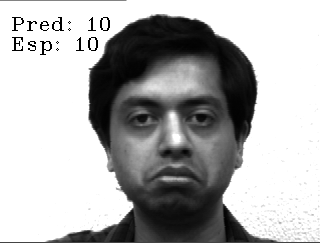

In [33]:
cv2.putText(imagem_np, 'Pred: ' + str(previsao[0]),(10,30),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2.putText(imagem_np, 'Esp: ' + str(saida_esperada),(10,50),cv2.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0))
cv2_imshow(imagem_np)

In [40]:
paths = [os.path.join('/content/yalefaces/test',f) for f in os.listdir('/content/yalefaces/test')]
previsoes = []
saidas_esperadas = []
for path in paths:
  imagem = Image.open(path).convert('L')
  imagem_np = np.array(imagem,'uint8')
  previsao, _ = lbph_face_classifier.predict(imagem_np)
  #print(previsao)
  saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))
  #print(saida_esperada)

  previsoes.append(previsao)
  saidas_esperadas.append(saida_esperada)

In [41]:
previsoes = np.array(previsoes)
saidas_esperadas = np.array(saidas_esperadas)

In [42]:
previsoes

array([ 4, 12,  3, 13, 12, 13,  1,  5,  7, 14, 10,  4, 11,  6, 14,  5,  4,
        9,  9,  7,  5,  8, 11, 15,  7, 14,  9,  4,  9,  1])

In [43]:
saidas_esperadas

array([ 2, 12,  3, 13, 12, 13,  1,  2,  7, 14, 10,  8, 11,  6, 14,  5, 10,
        7,  3, 15,  5,  8, 11, 15,  9,  6,  4,  4,  9,  1])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas,previsoes)

0.6666666666666666

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

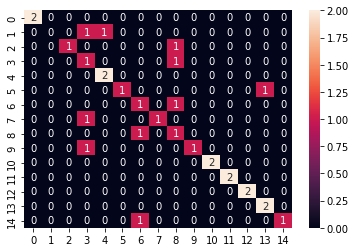

In [46]:
import seaborn
seaborn.heatmap(cm, annot=True);